In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

CLOCK = 12.5
DRIFT_VEL = 5.2

In [54]:
file = h5py.File("../data/clean/runs/clean_run_0130.h5", "r")

In [55]:
dataset = file["/clean"]

In [56]:
n_events = len(dataset)
print(n_events)

46447


In [274]:
disc = np.load("../data/clean/discarded/discarded_events_0130.npy")
disc.shape

FileNotFoundError: [Errno 2] No such file or directory: '../data/clean/discarded/discarded_events_0130.npy'

In [45]:
for i in dataset:
    dataset[str(i)]

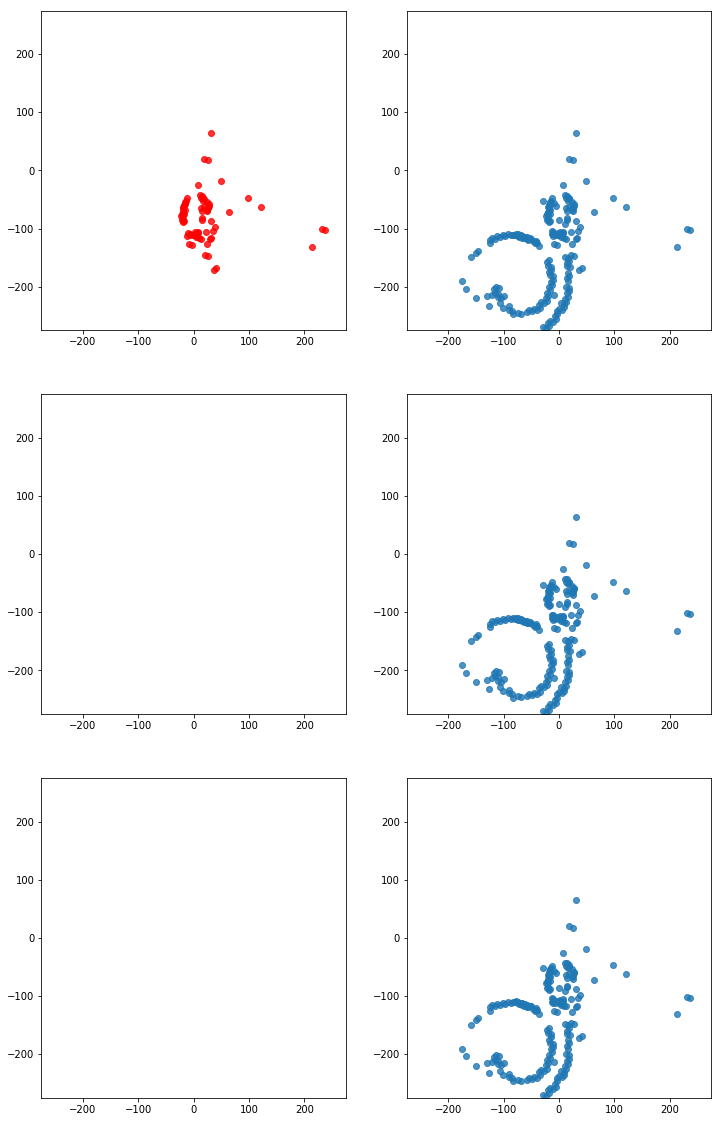

In [299]:
#xyz = dataset["6745"]
xyz = dataset[str(1567)]
a = np.array(xyz)
to_del = []

filtered_1 = a[a[:, 6] > 100]
filtered_2 = a[(a[:, 2]*DRIFT_VEL/CLOCK) > 1250]
filtered_3 = a[a[:, 5] < -1e-12]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))
#ax.scatter(a[:,0], a[:,1])
ax[0][0].scatter(filtered_1[:,0], filtered_1[:,1], c="r", alpha=0.8)
ax[0][1].scatter(a[:,0], a[:,1], alpha=0.8)
ax[1][0].scatter(filtered_2[:,0], filtered_2[:,1], c="g", alpha=0.4)
ax[1][1].scatter(a[:,0], a[:,1], alpha=0.8)
ax[2][0].scatter(filtered_3[:,0], filtered_3[:,1], c="brown", alpha=0.4)
ax[2][1].scatter(a[:,0], a[:,1], alpha=0.8)

for a_ in ax:
    for i in a_:
        i.set_ylim((-275, 275)) 
        i.set_xlim((-275, 275))

In [145]:
len(filtered_3)

57

(-275, 275)

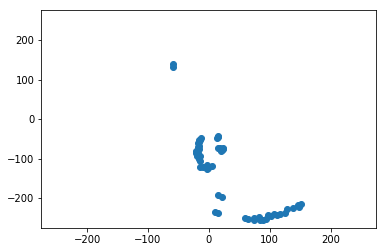

In [146]:
plt.scatter(filtered_3[:,0], filtered_3[:,1])
plt.ylim((-275, 275)) 
plt.xlim((-275, 275))

In [147]:
import pandas as pd
labels_run = pd.read_csv("../labels/run_0130_labels.csv")
index_labels = labels_run["evt_id"].values.astype(str)

In [144]:
labels_run.head()

,evt_id,label,iffy
0,0,j,NaN
1,1,j,NaN
2,2,j,NaN
3,3,j,NaN
4,4,j,NaN


In [155]:
from joblib import Parallel, delayed 

an_array = np.zeros(400)

def func(i):
    print("what?")
    an_array[i] = 45
    
_ = Parallel(n_jobs=4)(delayed(func)(i) for i in range(len(an_array)))

In [352]:
evts = np.load("../data/clean/images/run_0210_label_True_size_49.npy")
targets = np.load("../data/clean/targets/run_0210_targets_size_49.npy")
labelled_disc = np.load("../data/clean/discarded/discarded_events_0210_label_True.npy")
print("n labelled: ", targets.size)
print("discarded labelled: ", labelled_disc.size)

n labelled:  1582
discarded labelled:  201


event TYPE:  0


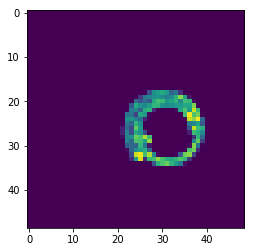

In [383]:
ev_id = 469
plt.imshow(evts[ev_id].reshape((49, 49)))
print("event TYPE: ",targets[ev_id])
#plt.gca().axis("off")

In [371]:
class_type = evts[targets==2]
print("mean ", class_type[class_type>0].mean())
print("std ", class_type[class_type>0].std())

mean  0.23579277043154828
std  0.21646527063001195


<BarContainer object of 3 artists>

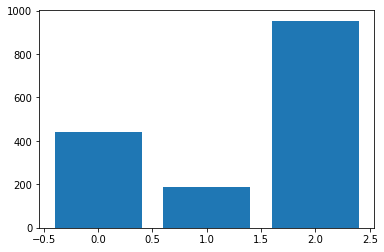

In [366]:
plt.bar(np.arange(3), np.bincount(targets),)

In [254]:
np.bincount(targets)

array([211, 110, 380])

In [74]:
np.load("../data/clean/targets/train_targets_size_50.npy").shape

(890,)